In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline


In [40]:
shots_df = pd.read_csv('data/19_20_shot_quality.csv')
season_df = pd.read_excel('data/19_20_SEASON_STATS.xlsx')

In [41]:
merged = pd.merge(shots_df,season_df, on="Team")
merged.sort_values(by=['Team'], inplace=True)

In [42]:
merged.columns

Index(['Team', 'aboveFor', 'belowFor', 'aboveAgainst', 'belowAgainst',
       'abovePercent', 'belowPercent', 'forPercent', 'againstPercent', 'Rk',
       'Team_name', 'AvAge', 'GP', 'W', 'L', 'OL', 'PTS', 'PTS%', 'GF', 'GA',
       'SOW', 'SOL', 'SRS', 'SOS', 'TG/G', 'EVGF', 'EVGA', 'PP', 'PPO', 'PP%',
       'PPA', 'PPOA', 'PK%', 'SH', 'SHA', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SA',
       'SV%', 'SO'],
      dtype='object')

In [82]:
def make_graph(X,Y,SAVE_AS="do_not"):
    #set up the variables
    x=merged[X]
    y=merged[Y]
    m, b = np.polyfit(x,y,1)
    y_pred = m*x+b
    r2=round(r2_score(y,y_pred),2)
    #Make the graph
    fig = plt.figure(figsize=(32,16))
    fig, ax = plt.subplots()
    ax.scatter(x,y,c="#ff3300")
    ax.plot(x,y_pred)
    ax.set_xlabel(X)
    ax.set_ylabel(Y)
    ax.set_title(f"R2 score = {r2}")
    #To save the image if desired
    if SAVE_AS != "do_not":
        fig.savefig(f"data/{SAVE_AS}.png")
    

<Figure size 2304x1152 with 0 Axes>

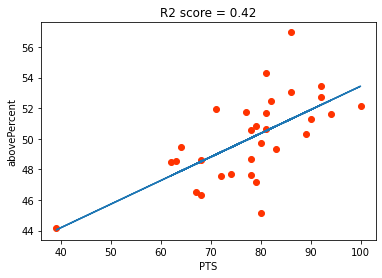

In [83]:
make_graph('PTS','abovePercent',"PTSvABP")